# Comprehensive Bivariate Analysis

01. Import depedencies

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

02. Load Dataset

In [2]:
df = pd.read_csv('../data/raw/TelcoCustomerChurnPrediction.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 03. Bivariate Analysis

### Categorical vs Categorical
- Measures:
    - Chi-square test of independence
    - Contingency tables
    - Cramer’s V / Phi coefficient (strength of association)
     Odds ratio (for binary categories)

- Visualizations:
    - Crosstab (frequency table)
    - Grouped Bar Chart
    - Mosaic Plot
    - Heatmap of proportions

### Categorical vs Numerical
- Measures:
    - t-test (two groups, e.g., Male vs Female Income)
    - ANOVA (more than two groups, e.g., Income across multiple Education levels)
    - Effect Size (Cohen’s d, Eta-squared)

- Visualizations:
    - Boxplot
    - Violin Plot
    - Barplot with error bars (mean ± CI)

### Numerical vs Numerical
- Measures:
    - Correlation Coefficient (Pearson, Spearman, Kendall)
    - Simple Linear Regression
    - Covariance

- Visualizations:
    - Scatter Plot (with regression line)
    - Pair Plot (Seaborn pairplot)
    - Heatmap of correlations

### 3.1 Churn vs Demographics

In [4]:
# Categorical vs Categorical
demographic_features = [
                            "gender", "SeniorCitizen", "Partner", "Dependents"
                       ]

In [11]:
# Crosstab (contingency table)
for feat in demographic_features:
    print(f"\n --- Contingency Table for {feat} ---")
    ct = pd.crosstab(df[feat], df["Churn"], normalize="index") * 100
    print(ct)

    # optionally chi-squaure test

    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"\nChi-Square Value for {feat}:", chi2)
    print(f"Degrees of Freedom for {feat}:", dof)
    print(f"P-Value for {feat}:", p)
    print(f"Expected Frequencies for {feat}:\n", expected)

    # Interpretation
    if p < 0.05:
        print(f"\nReject H₀: There is a significant association between {feat} and Churn.")
    else:
        print(f"\nFail to reject H₀: No significant association between {feat} and Churn.")


 --- Contingency Table for gender ---
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338

Chi-Square Value for gender: 0.0
Degrees of Freedom for gender: 1
P-Value for gender: 1.0
Expected Frequencies for gender:
 [[73.45939544 26.54060456]
 [73.45939544 26.54060456]]

Fail to reject H₀: No significant association between gender and Churn.

 --- Contingency Table for SeniorCitizen ---
Churn                 No        Yes
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261

Chi-Square Value for SeniorCitizen: 6.630074875819638
Degrees of Freedom for SeniorCitizen: 1
P-Value for SeniorCitizen: 0.010027104944620521
Expected Frequencies for SeniorCitizen:
 [[67.3562853 32.6437147]
 [67.3562853 32.6437147]]

Reject H₀: There is a significant association between SeniorCitizen and Churn.

 --- Contingency Table for Partner ---
Churn           No        Yes
Partner          

### Insights from Chi-sqaure test

- Gender does not influence customer churn in this dataset.
    - Business takeaway: Gender-based targeting for churn reduction is not effective.

- Senior citizens are much more likely to churn than younger customers.
    - Business takeaway: Seniors may have different needs (pricing, support, digital literacy) → consider senior-friendly retention strategies (discounts, specialized support).

- Having a partner seems to reduce churn risk.
    - Business takeaway: Customers without partners may need stronger engagement/loyalty programs, since they are at higher risk.

- Having dependents is linked to lower churn risk.
    - Business takeaway: Customers with dependents may find the service more essential/reliable → focus retention efforts on customers without dependents.

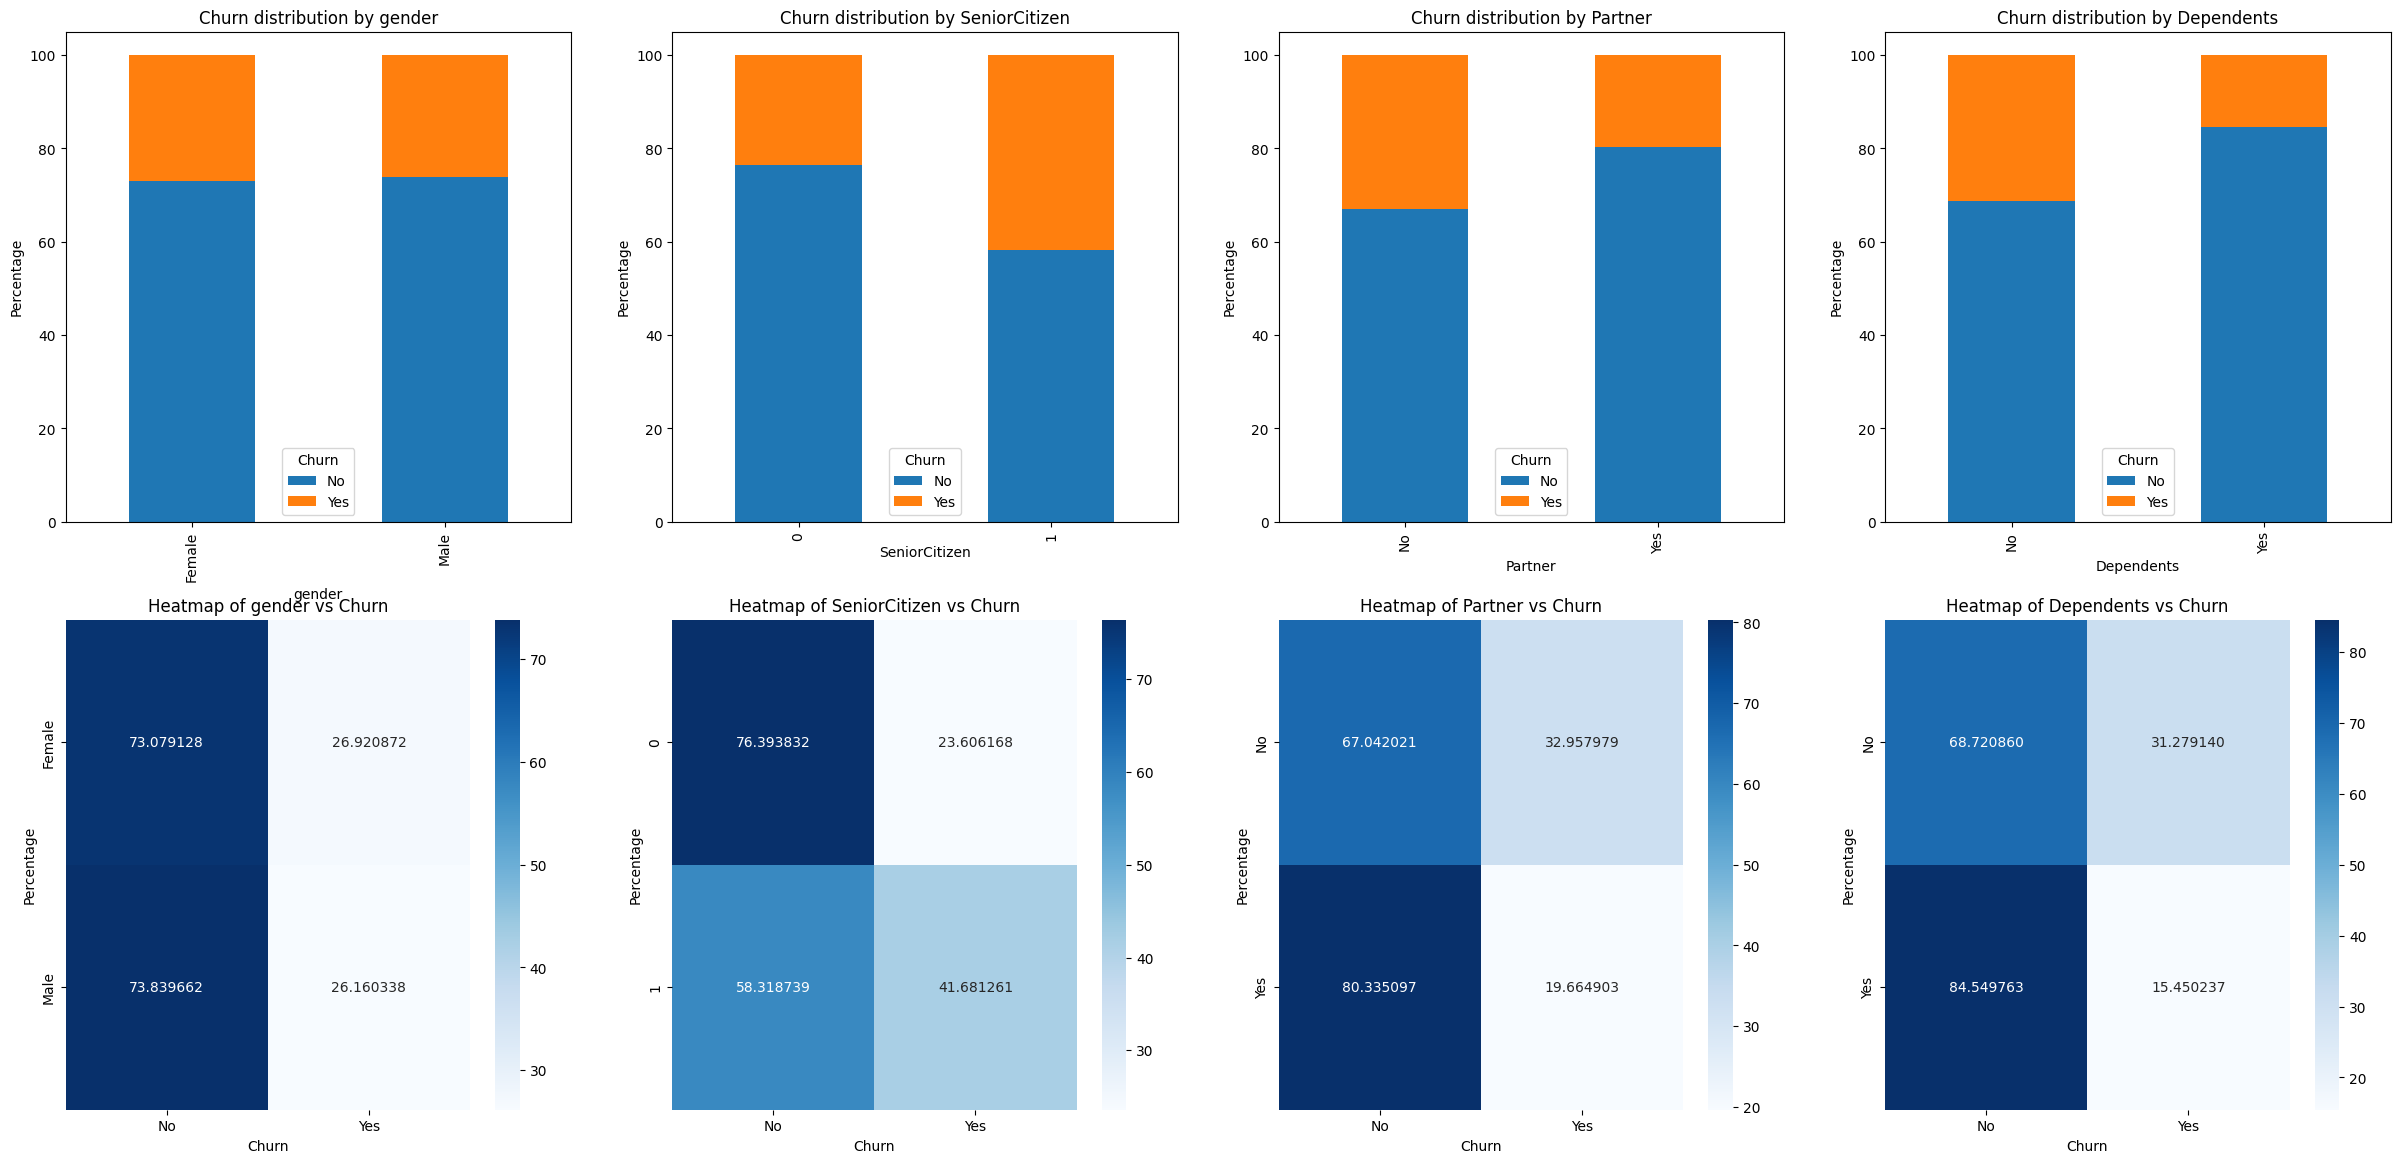

In [34]:
# Visualize
fig, axes = plt.subplots(2, 4, figsize=(30, 14))
for i, feat in enumerate(demographic_features):
    ct = pd.crosstab(df[feat], df["Churn"], normalize="index") * 100

    # Stacked bar chart
    ct.plot(kind="bar", stacked=True, ax=axes[0, i])
    axes[0, i].set_title(f"Churn distribution by {feat}")
    axes[0, i].set_ylabel("Percentage")

    sns.heatmap(ct, annot=True, cmap="Blues", fmt="f", ax=axes[1, i])
    axes[1, i].set_title(f"Heatmap of {feat} vs Churn")
    axes[1, i].set_ylabel("Percentage")

### 3.2 Churn vs Services

In [ ]:
behavioral_features = [
                            "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
                            "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling"
                      ]

In [ ]:
financial_features = [
                            "PaymentMethod", "MonthlyCharges", "TotalCharges"
                     ]